In [1]:
# Import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Sort by Month (ISPA)

In [2]:
# Add csv file
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/overlay_allvar/allvar_ispa_all.csv')
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   pm2p5         300 non-null    float64
 8   time          300 non-null    object 
 9   RH            300 non-null    float64
 10  t2m           300 non-null    float64
 11  tp            300 non-null    float64
 12  ispa          300 non-null    int64  
 13  pm10          300 non-null    float64
 14  so2           300 non-null    float64
 15  ispa_balita   300 non-null    int64  
 16  ispa_5y       300 non-null    int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 40.0+ KB


In [3]:
# Drop the columns
df_ispa = df_ispa.drop(['Unnamed: 0', 'RH', 'so2', 'pm10', 'pm2p5', 'tp', 't2m'], axis=1)

In [4]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   KABKOT        300 non-null    object 
 2   month         300 non-null    int64  
 3   year          300 non-null    int64  
 4   longitude     300 non-null    float64
 5   latitude      300 non-null    float64
 6   time          300 non-null    object 
 7   ispa          300 non-null    int64  
 8   ispa_balita   300 non-null    int64  
 9   ispa_5y       300 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 23.6+ KB


In [5]:
# Filter for years 2018-2022
data_ispa = df_ispa[(df_ispa['year'] >= 2018) & (df_ispa['year'] <= 2022)]

# Group sum_ispa by KABKOT, month, and time
ispa_sort = data_ispa.groupby(['KABKOT', 'month', 'time'])['ispa_5y'].sum()
ispa_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    21514
                      2019-01-01    21402
                      2020-01-01    28072
                      2021-01-01     6443
                      2022-01-01    13408
                                    ...  
JAKARTA UTARA  12     2018-12-01    18216
                      2019-12-01    22118
                      2020-12-01     3194
                      2021-12-01     7909
                      2022-12-01    15913
Name: ispa_5y, Length: 300, dtype: int64

Sort by Month (PM2.5)

In [6]:
# Add csv file
df_pm25 = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/overlay_allvar/allvar_ispa_all.csv')
df_pm25 = df_pm25.drop(['Unnamed: 0', 'ispa', 't2m', 'RH', 'so2', 'pm10'], axis=1)
df_pm25

,Unnamed: 0.1,KABKOT,month,year,longitude,latitude,pm2p5,time,tp,ispa_balita,ispa_5y
0,0,JAKARTA BARAT,1,2018,106.750000,-6.158333,32.990347,2018-01-01,7.256567,13522,21514
1,1,JAKARTA BARAT,2,2018,106.750000,-6.158333,39.145521,2018-02-01,9.965402,12937,23476
2,2,JAKARTA BARAT,3,2018,106.750000,-6.158333,44.443065,2018-03-01,7.343809,12937,27114
3,3,JAKARTA BARAT,4,2018,106.750000,-6.158333,61.214024,2018-04-01,6.208611,10849,22222
4,4,JAKARTA BARAT,5,2018,106.750000,-6.158333,68.229752,2018-05-01,2.895800,9575,22691
...,...,...,...,...,...,...,...,...,...,...,...
295,295,JAKARTA UTARA,8,2022,106.891667,-6.125000,60.172357,2022-08-01,2.435247,6287,17425
296,296,JAKARTA UTARA,9,2022,106.891667,-6.125000,61.185956,2022-09-01,4.522162,7962,21946
297,297,JAKARTA UTARA,10,2022,106.891667,-6.125000,49.726068,2022-10-01,8.589306,8871,22766
298,298,JAKARTA UTARA,11,2022,106.891667,-6.125000,46.806576,2022-11-01,5.543476,10906,25861


In [7]:
# Filter for years 2018-2022
data_pm25 = df_pm25[(df_pm25['year'] >= 2018) & (df_pm25['year'] <= 2022)]

# Group mean_RH by KABKOT, month, and time
pm25_sort = data_pm25.groupby(['KABKOT', 'month', 'time'])['pm2p5'].mean()
pm25_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    32.990347
                      2019-01-01    39.819253
                      2020-01-01    39.201529
                      2021-01-01    38.770220
                      2022-01-01    40.907131
                                      ...    
JAKARTA UTARA  12     2018-12-01    41.536175
                      2019-12-01    48.068403
                      2020-12-01    30.788003
                      2021-12-01    42.553266
                      2022-12-01    39.195320
Name: pm2p5, Length: 300, dtype: float64

Merge ISPA and pm2p5 (sorted)

In [8]:
merge_ispa_pm25 = pd.merge(ispa_sort, pm25_sort, on=['KABKOT','month','time'])
merge_ispa_pm25

ispa_5y      pm2p5
KABKOT        month time                          
JAKARTA BARAT 1     2018-01-01    21514  32.990347
                    2019-01-01    21402  39.819253
                    2020-01-01    28072  39.201529
                    2021-01-01     6443  38.770220
                    2022-01-01    13408  40.907131
...                                 ...        ...
JAKARTA UTARA 12    2018-12-01    18216  41.536175
                    2019-12-01    22118  48.068403
                    2020-12-01     3194  30.788003
                    2021-12-01     7909  42.553266
                    2022-12-01    15913  39.195320

[300 rows x 2 columns]

In [9]:
overlay = merge_ispa_pm25.groupby(['KABKOT', 'month']).agg({'ispa_5y':'sum', 'pm2p5':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

# rename columns
overlay = overlay.rename(columns={'ispa_5y': 'sum_ispa', 'pm2p5':'mean_pm25'})

In [10]:
overlay

,KABKOT,month,sum_ispa,mean_pm25
0,JAKARTA BARAT,1,90839,38.337696
1,JAKARTA BARAT,2,108249,40.822498
2,JAKARTA BARAT,3,100122,46.289806
3,JAKARTA BARAT,4,68004,56.138215
4,JAKARTA BARAT,5,59732,61.726104
5,JAKARTA BARAT,6,53995,63.506840
6,JAKARTA BARAT,7,66370,62.563071
7,JAKARTA BARAT,8,73540,59.944935
8,JAKARTA BARAT,9,70522,58.257953
9,JAKARTA BARAT,10,77470,57.980536


Rename month for month_name

In [11]:
import calendar

# Format for monthly graph
overlay['month'] = pd.to_datetime(overlay['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
overlay= overlay.set_index('month').reset_index()

Plot ISPA x PM2.5

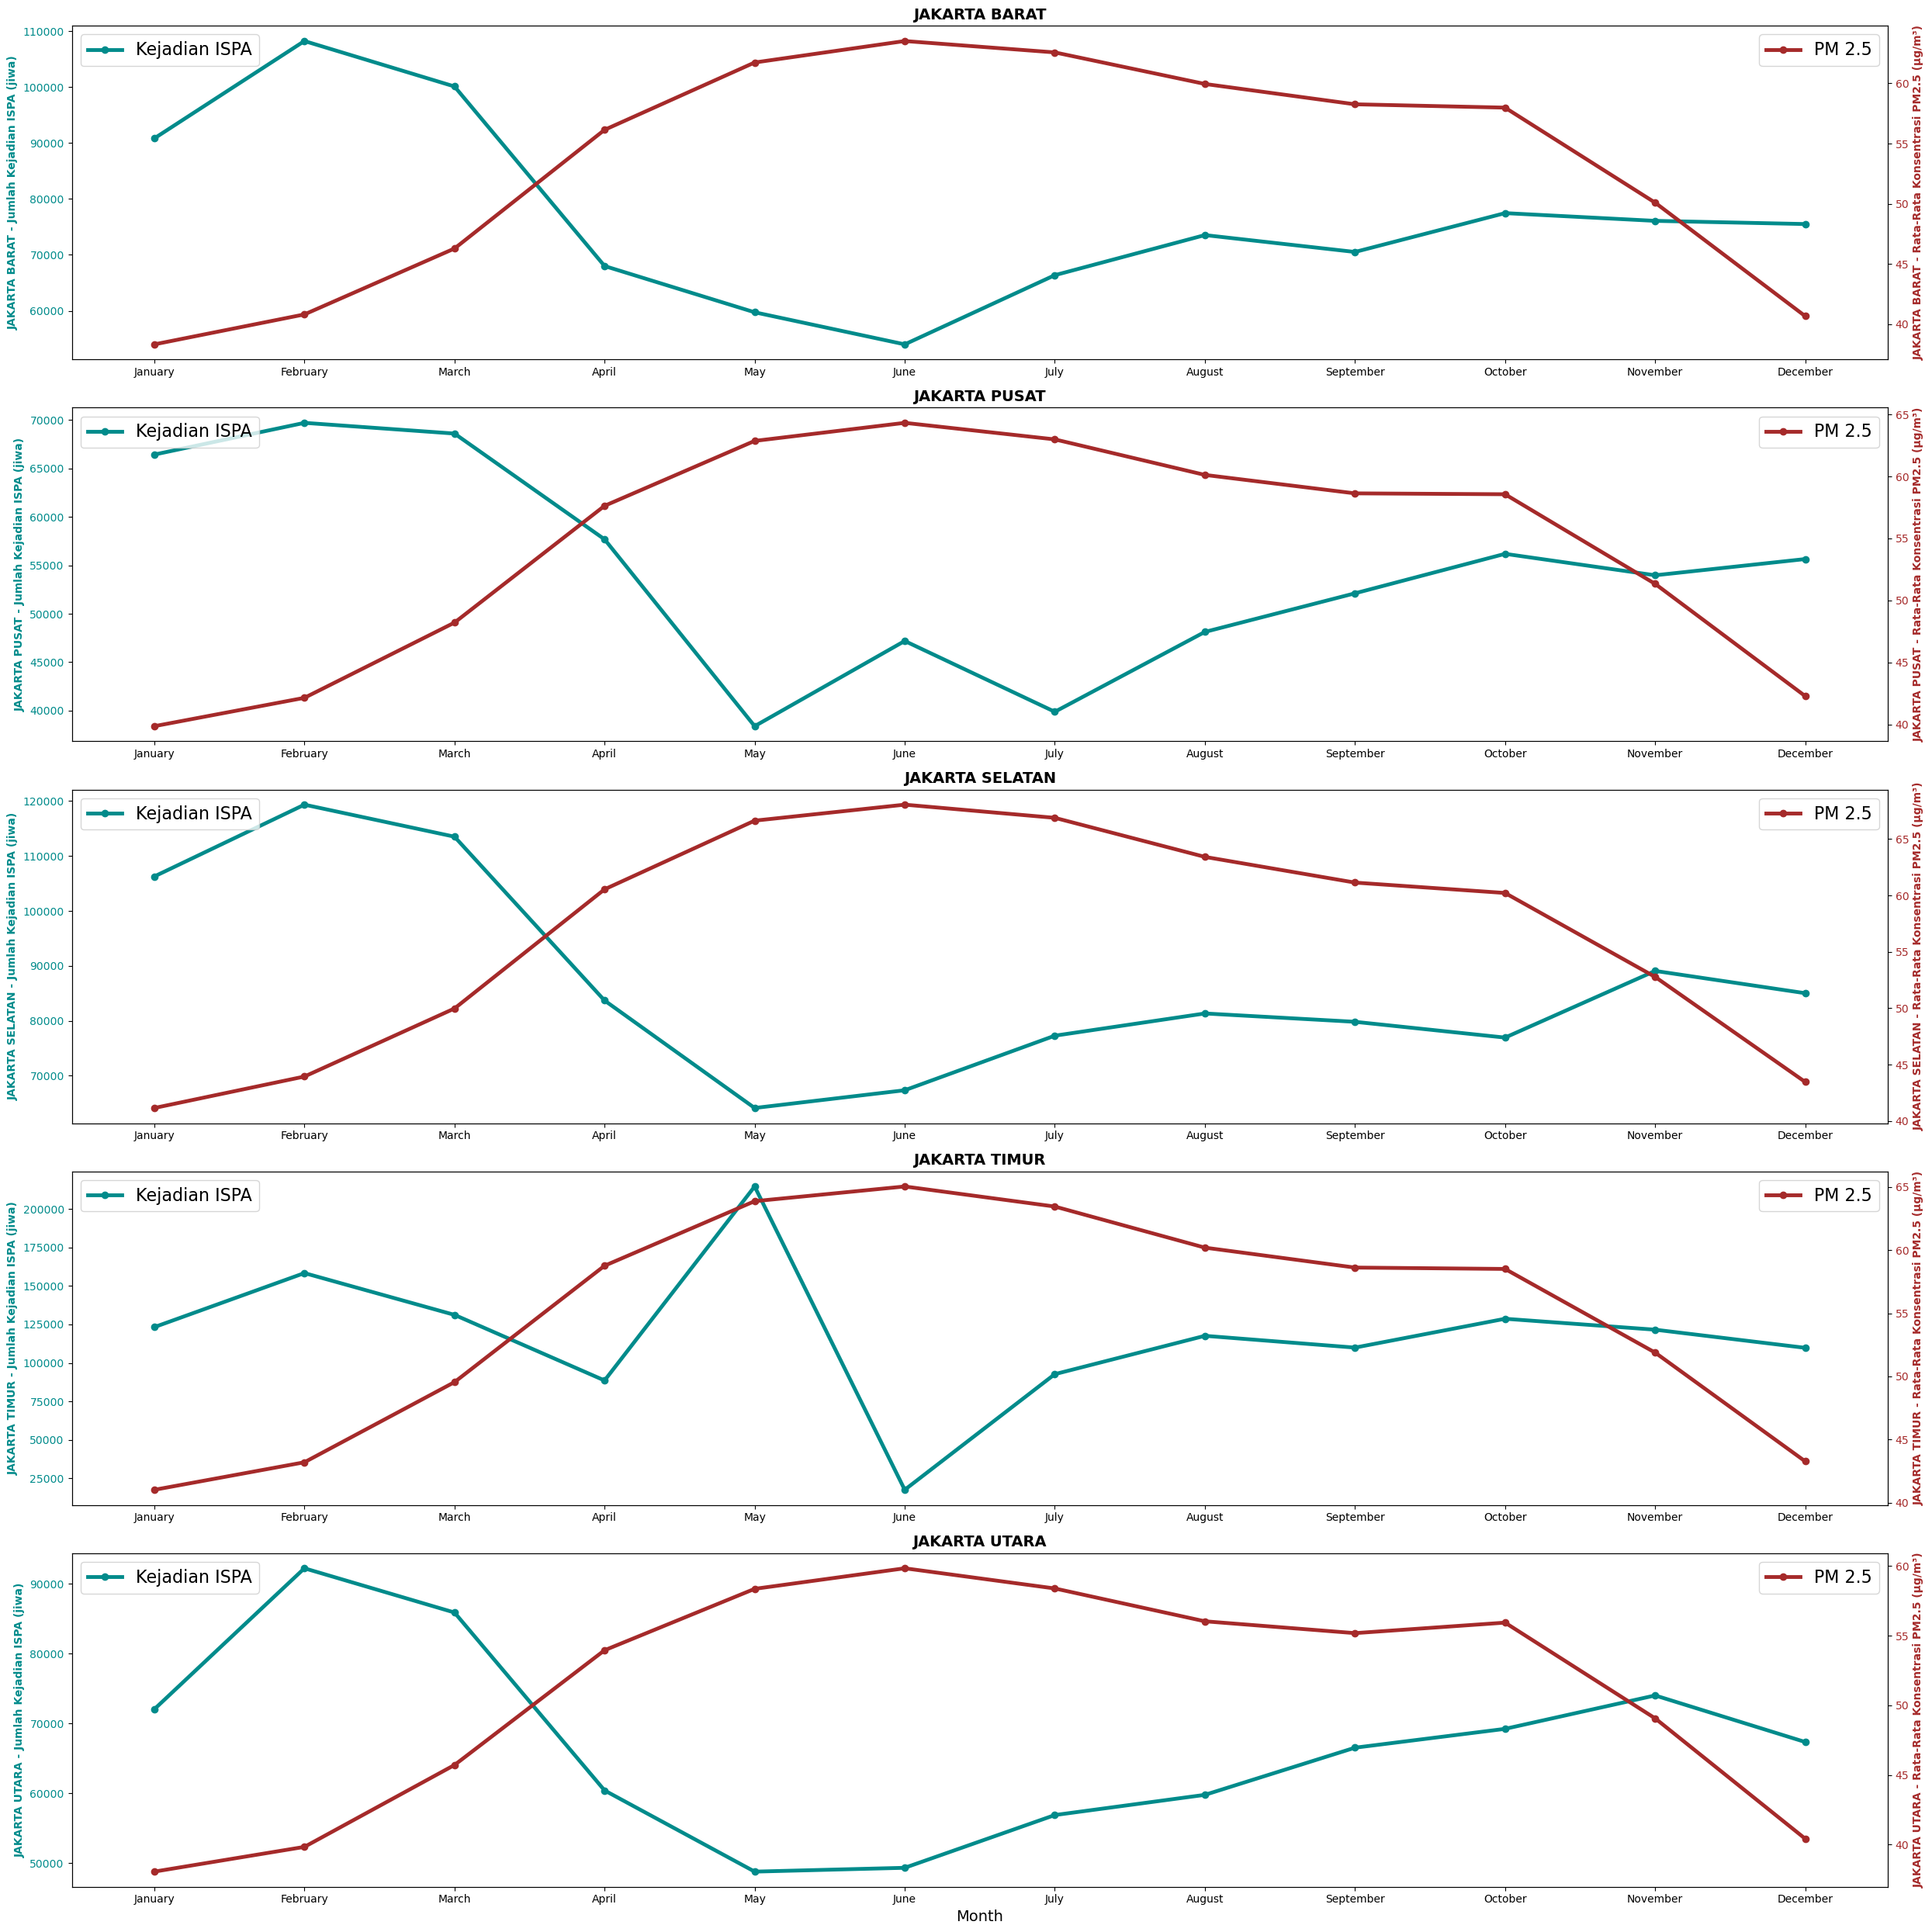

In [12]:
indicators = ['sum_ispa', 'mean_pm25']

# Group data by KABKOT
grouped_data = overlay.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=False)

for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['sum_ispa']
    y2 = group['mean_pm25']

    ax.plot(x, y1, label='Kejadian ISPA', marker='o', linewidth=3.5, color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian ISPA (jiwa)', color='darkcyan', weight='bold')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='PM 2.5', marker='o',linewidth=3.5, color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Konsentrasi PM2.5 (µg/m³)', color='brown', weight='bold')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)

# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', weight='bold', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR', weight='bold', fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', weight='bold', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', weight='bold', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', weight='bold', fontsize= 14)

plt.tight_layout()
plt.show()